<a href="https://colab.research.google.com/github/assistantsiri784/nice/blob/main/data_wizard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import sklearn

In [ ]:
from scipy import stats

In [ ]:
from sklearn import linear_model

In [ ]:
c = pd.read_csv("/content/climate_change_dataset.csv")

In [ ]:
c.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
c.tail()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
995,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5
999,2011,Germany,24.1,17.3,2.1,2854,398407112,41.0,3,19.8


In [ ]:
c.shape

(1000, 10)

In [ ]:
c.dtypes

,0
Year,int64
Country,object
Avg Temperature (°C),float64
CO2 Emissions (Tons/Capita),float64
Sea Level Rise (mm),float64
Rainfall (mm),int64
Population,int64
Renewable Energy (%),float64
Extreme Weather Events,int64
Forest Area (%),float64


In [ ]:
c.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
c.fillna(value=c.sum(), inplace=True)

In [ ]:
c.dropna()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
...,...,...,...,...,...,...,...,...,...,...
995,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5


In [ ]:
c['Country'].nunique()

15

In [ ]:
c['Year'].min(), "-", c['Year'].max()

(2000, '-', 2023)

In [ ]:
c['Year'] = c['Year'].astype(int)

now, we will do work on UK data

In [ ]:
c

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
...,...,...,...,...,...,...,...,...,...,...
995,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5


In [ ]:
# here we find the value of Renewable Energy (%) when Avg Temperature (°C), CO2 Emissions (Tons/Capita) have specifice value
UK_data = c[c["Country"] == "UK"]
X = UK_data[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)']]
y = UK_data['Renewable Energy (%)']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedCO2_uk = regr.predict([[20, 10]])

print(f"When Avg Temperature is 20°C and CO2 Emissions are 10 tons/capita:")
print(f"→ Predicted Renewable Energy (%) for UK: {predictedCO2_uk[0]:.2f}")

When Avg Temperature is 20°C and CO2 Emissions are 10 tons/capita:
→ Predicted Renewable Energy (%) for UK: 28.96


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


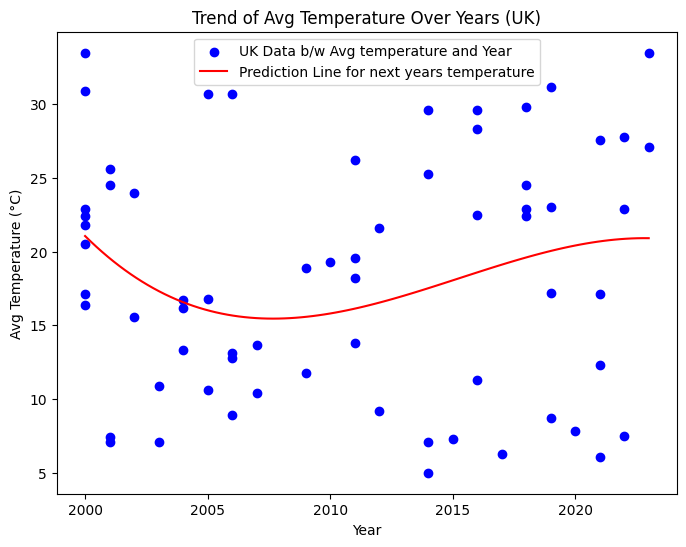

In [ ]:
# Filter for UK data to year and avg temperature for predication in next year
df_uk = c[c["Country"] == "UK"]

x_uk = df_uk["Year"]
y_uk = df_uk["Avg Temperature (°C)"]

mymodel_uk = np.poly1d(np.polyfit(x_uk, y_uk, 3))

x_line_uk = np.linspace(x_uk.min(), x_uk.max(), 100)

plt.figure(figsize=(8, 6))
plt.scatter(x_uk, y_uk, label='UK Data b/w Avg temperature and Year', color='blue')
plt.plot(x_line_uk, mymodel_uk(x_line_uk), color='red', label='Prediction Line for next years temperature')
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.title("Trend of Avg Temperature Over Years (UK)")
plt.legend()
plt.show()

Global CO2 Emissions Over Time

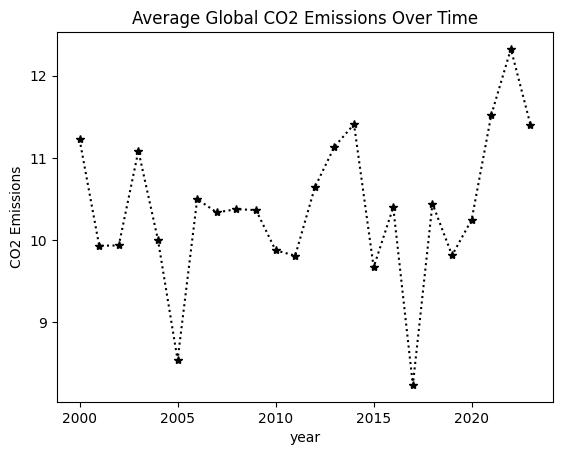

In [ ]:
# Global CO2 Emissions Over Time
global_co2 = c.groupby('Year')['CO2 Emissions (Tons/Capita)'].mean()
global_co2.plot(title='Average Global CO2 Emissions Over Time', marker='*',ls=':', color='Black')
plt.ylabel("CO2 Emissions")
plt.xlabel("year")
plt.show()

Top 10 Hottest Countries by Avg Temperature

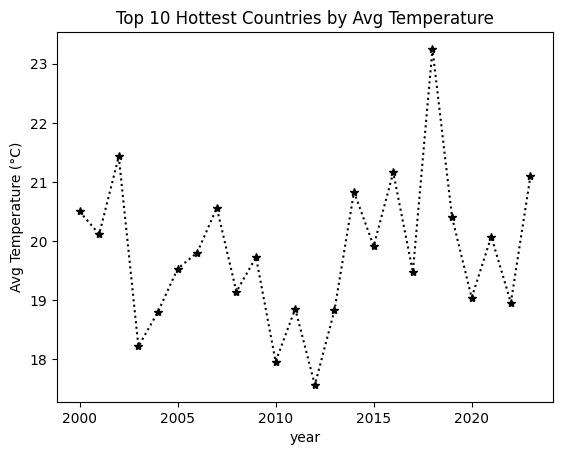

In [ ]:
# Top 10 Hottest Countries by Avg Temperature
global_temp = c.groupby('Year')['Avg Temperature (°C)'].mean()
global_temp.plot(title='highest average temperatures over the years', marker='*',ls=':', color='Black')
plt.title("Top 10 Hottest Countries by Avg Temperature")
plt.xlabel("year")
plt.ylabel("Avg Temperature (°C)")
plt.show()

explor the data all countries b/w Avg Temperatur Over Year

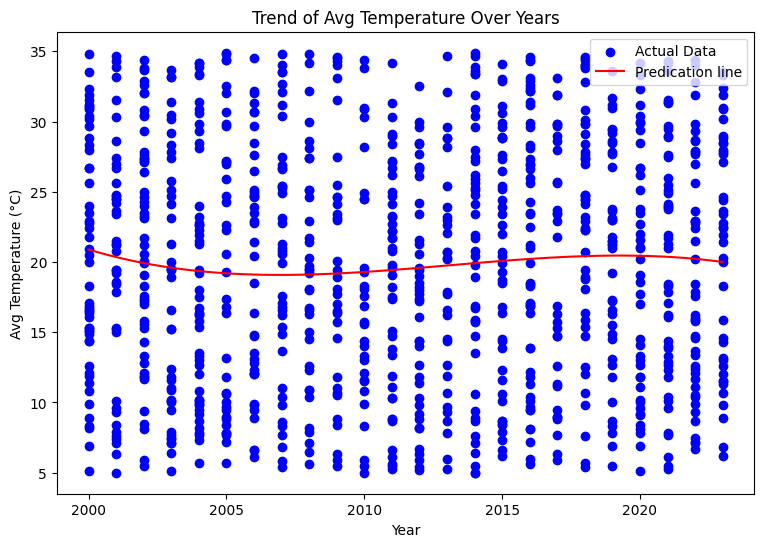

In [ ]:
# explor the data all countries b/w Avg Temperatur Over Year
x11 = c["Year"]
y11 = c["Avg Temperature (°C)"]

mymodel = np.poly1d(np.polyfit(x11, y11, 3))

x_line = np.linspace(x11.min(), x11.max(), 100)

plt.figure(figsize=(9, 6))
plt.scatter(x11, y11, label='Actual Data', color='blue')
plt.plot(x_line, mymodel(x_line), color='red', label='Predication line')
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.title("Trend of Avg Temperature Over Years")
plt.legend()
plt.show()

Grouping by decade and analyzing trends

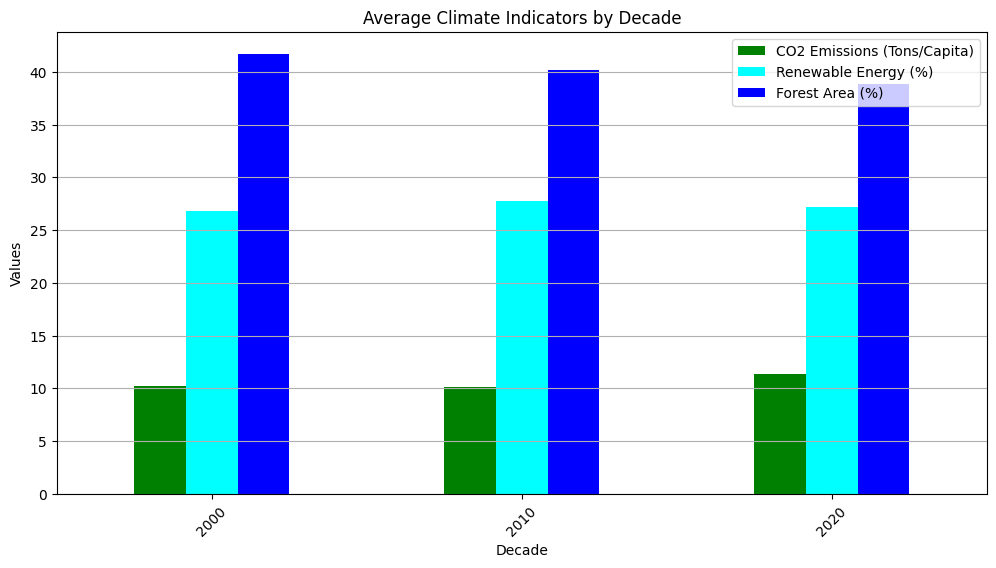

In [ ]:
# Grouping by decade and analyzing trends
c['Decade'] = (c['Year'] // 10) * 10
colors = ['Green', 'Cyan', 'blue']

decade_group = c.groupby('Decade')[['CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)', 'Forest Area (%)']].mean()
decade_group.plot(kind='bar', figsize=(12,6), color = colors)
plt.title('Average Climate Indicators by Decade')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

orrelation between CO2 emissions and renewable energy

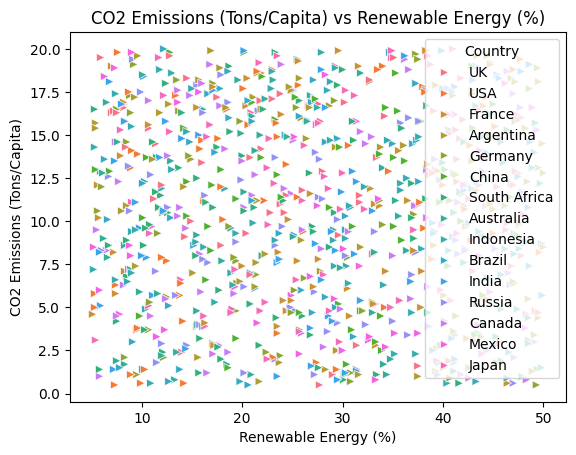

In [ ]:
# orrelation between CO2 emissions and renewable energy
array1 = 'Renewable Energy (%)'
array2 = 'CO2 Emissions (Tons/Capita)'

sns.scatterplot(data=c, x=array1, y=array2, hue='Country',color='black', marker='>')
plt.title(f'{array2} vs {array1}')
plt.show()

Temperature Trends

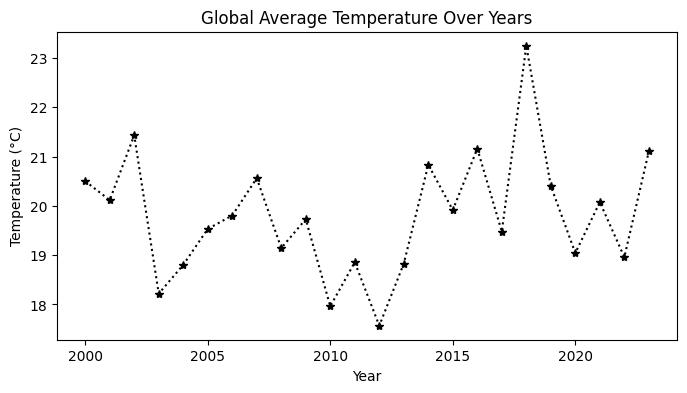

In [ ]:
# Temperature Trends
temp_by_year = c.groupby('Year')['Avg Temperature (°C)'].mean()
temp_by_year.plot(kind='line', title='Global Average Temperature Over Years', figsize=(8,4), ls=':', marker='*', color='black')
plt.ylabel("Temperature (°C)")
plt.show()

Distribution of Extreme Weather Events

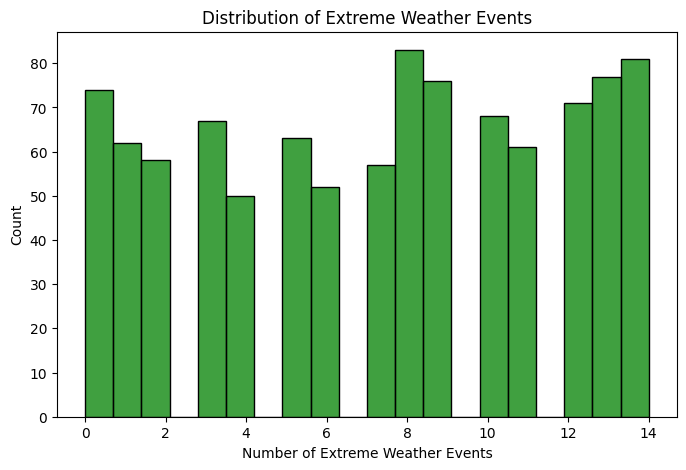

In [ ]:
# Distribution of Extreme Weather Events
plt.figure(figsize=(8, 5))
sns.histplot(c['Extreme Weather Events'], bins=20, color='Green')
plt.title('Distribution of Extreme Weather Events')
plt.xlabel('Number of Extreme Weather Events')
plt.show()

Top 10 countries with highest CO2 emissions in the latest year

/tmp/ipython-input-1220947208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_co2_countries, x='Country', y='CO2 Emissions (Tons/Capita)', palette='Greens_r', width=0.5)


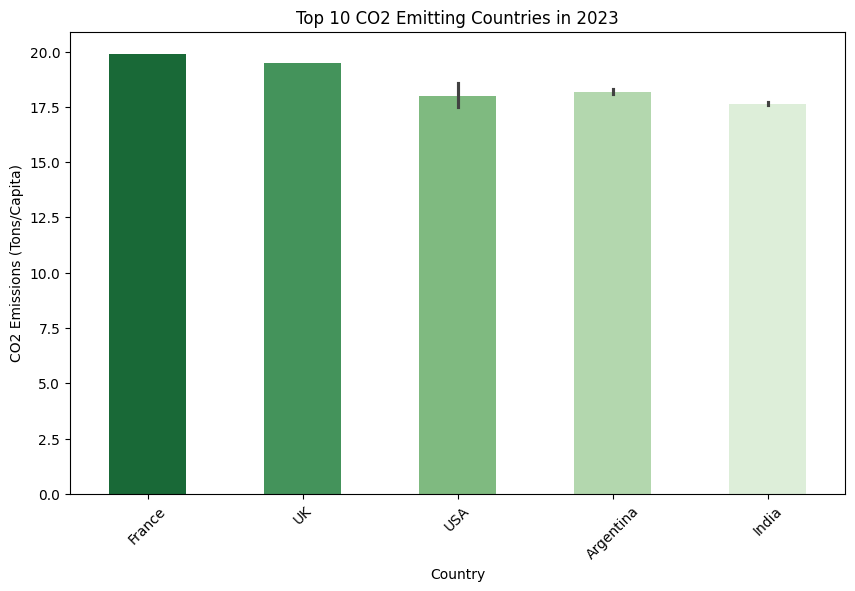

In [ ]:
# Top 10 countries with highest CO2 emissions in the latest year
latest_year = c['Year'].max()
top_co2_countries = c[c['Year'] == latest_year].sort_values(by='CO2 Emissions (Tons/Capita)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_co2_countries, x='Country', y='CO2 Emissions (Tons/Capita)', palette='Greens_r', width=0.5)
plt.title(f'Top 10 CO2 Emitting Countries in {latest_year}')
plt.xticks(rotation=45)
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()

Forest Area vs CO2

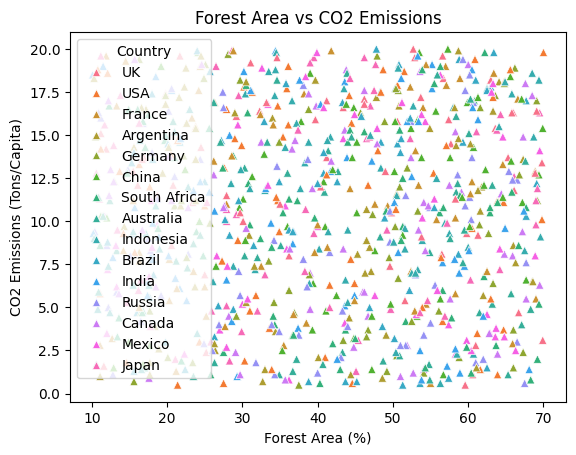

In [ ]:
# Forest Area vs CO2
sns.scatterplot(data=c, x='Forest Area (%)', y='CO2 Emissions (Tons/Capita)',color='black', hue='Country', marker='^')
plt.title('Forest Area vs CO2 Emissions')
plt.show()

top 10 country which have higest renewables

/tmp/ipython-input-25264318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=top_renewables, x='Country', y='Renewable Energy (%)', palette='Greens_r')


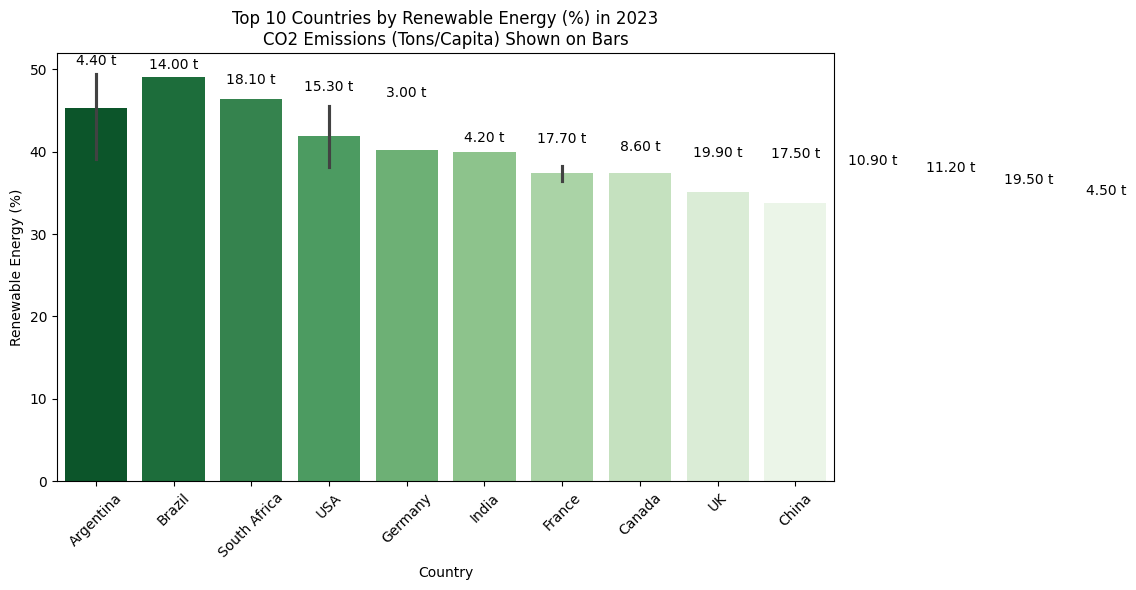

In [ ]:
high_year = c['Year'].max()
high_data = c[c['Year'] == high_year]

top_renewables = high_data.sort_values(by='Renewable Energy (%)', ascending=False).head(14)

plt.figure(figsize=(12,6))
bar = sns.barplot(data=top_renewables, x='Country', y='Renewable Energy (%)', palette='Greens_r')

for i, row in top_renewables.iterrows():
    bar.text( x=top_renewables.index.get_loc(i), y=row['Renewable Energy (%)'] + 1, s=f"{row['CO2 Emissions (Tons/Capita)']:.2f} t", ha='center', color='black')

plt.title(f"Top 10 Countries by Renewable Energy (%) in {high_year}\nCO2 Emissions (Tons/Capita) Shown on Bars")
plt.ylabel('Renewable Energy (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rainfall vs Extreme Events

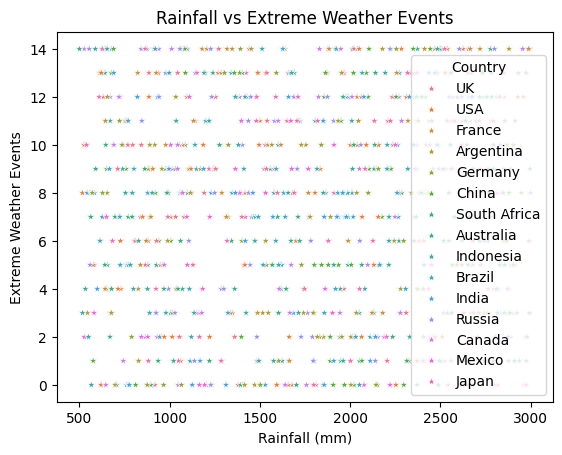

In [ ]:
sns.scatterplot(data=c, x='Rainfall (mm)', y='Extreme Weather Events', hue='Country', marker='*')
plt.title('Rainfall vs Extreme Weather Events')
plt.show()

Population vs CO2

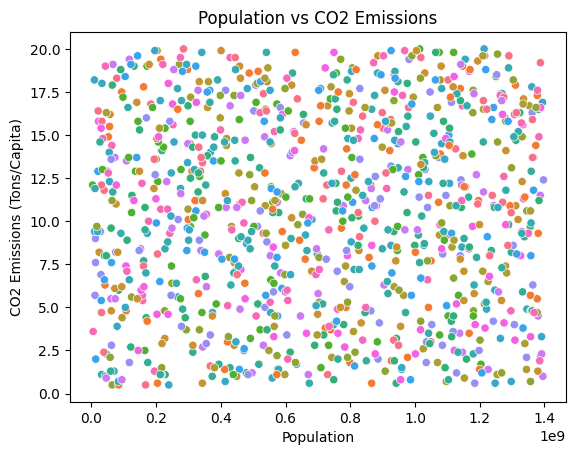

In [ ]:
sns.scatterplot(data=c, x='Population', y='CO2 Emissions (Tons/Capita)', hue='Country', legend=False)
plt.title('Population vs CO2 Emissions')
plt.show()